# Plot OOS data for events 

Plot the grace a and champ out of sample data for specefic events

In [23]:
#plot matplotlib figures in the notebook
%matplotlib inline

#auto reload modules before executing
%load_ext autoreload
%autoreload 2

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os, sys

from pymsis import msis

In [25]:
# queit day
sdate = '2008-05-10'
edate = '2008-05-18'
geo = 1

# small storm
#sdate = '2008-09-01'
#edate = '2008-09-12'
#geo = -1

# moderate storm
sdate = '2006-04-12'
edate = '2006-04-20'
geo = -1

# large storm
sdate = '2005-08-21'
edate = '2005-08-30'
geo = -1



In [26]:
def oos_dat(ddir = 'D:/data/SatDensities/',
            dmod = ['SI','FI','FI_GEO']):
    """
    Function to return the out of sample datasets from rf_model( )

    ----------
    
    None
    
    ddir: str
        file directory for data

    Returns
    -------
    os_df : Pandas DataFrame
        DataFrame with the out of sample data for each model.

    """  
    # create empty data frames for returning 
    oos_a = pd.DataFrame( )
    oos_b = pd.DataFrame( )

    # read in the data
    for mod in dmod:
        
        #with open(ddir+f'{mod}_RFdat.pkl','rb') as f:
        #print(f)
        dat_a, dat_b = pd.read_pickle(f'{ddir}{mod}_RFdat.pkl')[4:]
        dat_a = dat_a[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                           'storm','storm phase']]
        dat_a['Model'] = mod
        dat_b = dat_b[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                           'storm','storm phase']]
        dat_b['Model'] = mod
    
        oos_a = pd.concat([oos_a,dat_a])
        oos_b = pd.concat([oos_b,dat_b])

    # calculate residuals
    oos_a['resid'] = oos_a['400kmDensity'] - oos_a['400kmDensity_pred']
    oos_b['resid'] = oos_b['400kmDensity'] - oos_b['400kmDensity_pred']
    
    return oos_a, oos_b

In [27]:
#read in data
oos_ga, oos_ch = oos_dat( ) # grace A and CHAMP out of sample data

oos_ga['DateTime'] = pd.to_datetime(oos_ga['DateTime'])
oos_ch['DateTime'] = pd.to_datetime(oos_ch['DateTime'])

sdate = pd.to_datetime(sdate)
edate = pd.to_datetime(edate)

In [28]:
#define the data subsets
ga_si = oos_ga['Model'] == 'SI' # solar model
ga_fi = oos_ga['Model'] == 'FI' # FISM model
ga_fg = oos_ga['Model'] == 'FI_GEO' # FISM/GEO model

ch_si = oos_ch[(oos_ch['Model'] == 'SI') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ch_fi = oos_ch[(oos_ch['Model'] == 'FI') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # FISM model
ch_fg = oos_ch[(oos_ch['Model'] == 'FI_GEO') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # FISM GEO model

ga_si = oos_ga[(oos_ga['Model'] == 'SI') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ga_fi = oos_ga[(oos_ga['Model'] == 'FI') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # FISM model
ga_fg = oos_ga[(oos_ga['Model'] == 'FI_GEO') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # FISM GEO model


In [29]:
ch_si = oos_ch[(oos_ch['Model'] == 'SI') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ch_fi = oos_ch[(oos_ch['Model'] == 'FI') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # FISM model
ch_fg = oos_ch[(oos_ch['Model'] == 'FI_GEO') & (oos_ch['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ch['DateTime'] < edate)].sort_values(by='DateTime') # FISM GEO model

ga_si = oos_ga[(oos_ga['Model'] == 'SI') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # solar model
ga_fi = oos_ga[(oos_ga['Model'] == 'FI') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # FISM model
ga_fg = oos_ga[(oos_ga['Model'] == 'FI_GEO') & (oos_ga['DateTime'] > pd.to_datetime(sdate) - pd.Timedelta('1D')) & (oos_ga['DateTime'] < edate)].sort_values(by='DateTime') # FISM GEO model

In [30]:
ga_si = pd.merge_asof(ga_fi['DateTime'], ga_si,on='DateTime',tolerance=pd.Timedelta('12h'),direction='nearest')

In [31]:
sat_df = pd.read_hdf("D:/data/SatDensities/satdrag_database_grace_CHAMP.hdf5")
sat_df.columns
sat_df['SatDensity'] = sat_df['SatDensity']*(10**12)

Index(['DateTime', 'DateTime_omni', 'B', 'Bx_GSEGSM', 'By_GSE', 'Bz_GSE',
       'By_GSM', 'Bz_GSM', 'Vsw', 'Vx_GSE', 'Vy_GSE', 'Vz_GSE', 'Prho', 'Tp',
       'dynP', 'Esw', 'AE', 'AL', 'AU', 'SYM_D index', 'SYM_H index',
       'ASY_D index', 'ASY_H index', 'PC index', 'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)', 'Goes Proton flux (>60 MeV)',
       'DateTime_fism2', '225_00', '600_01', '1300_02', '2500_03', '5100_04',
       '11250_05', '18950_06', '25700_07', '30500_08', '43000_09', '59500_10',
       '72400_11', '72400_12', '85550_13', '85550_14', '85550_15', '94400_16',
       '94400_17', '94400_18', '98100_19', '100700_20', '103850_21',
       '113000_22', 'DateTime_si', 'F10', 'F81', 'S10', 'S81c', 'M10', 'M81c',
       'Y10', 'Y81c', 'DateTime_gr', 'CenterLat', 'SatLat', 'SatLon',
       'SatHeight', 'SatLT', 'SatDipoleLat', 'SatMagLon', 'SatMagLT',
       'SatDensity', '400kmDensity', '410kmDensity', 'NRLMSISe00atSat',
       'DenUncertainty', 'NumPts', '

In [32]:
# get time range where using for plotting to derive msis densities

ch_t = (sat_df['DateTime'] >= sdate) & (sat_df['DateTime'] <= edate)
alts = np.zeros(sat_df.loc[ch_t,'DateTime'].shape[0])
alts[:] = 400

data = msis.run(sat_df.loc[ch_t,'DateTime'],sat_df.loc[ch_t,'SatLon'], sat_df.loc[ch_t,'SatLat'], alts, geomagnetic_activity=geo)

msis_pro = pd.DataFrame({'DateTime':sat_df.loc[ch_t,'DateTime'], 'msis':data[:,0]*10**12})
msis_pro['resid'] = sat_df.loc[ch_t,'400kmDensity'] -  msis_pro['msis']

In [33]:
msis_pro

,DateTime,msis,resid
382464,2005-08-21 00:00:00,1.732047,-1.732047
382465,2005-08-21 00:05:00,1.520976,-1.520976
382466,2005-08-21 00:10:00,1.305314,-1.305314
382467,2005-08-21 00:15:00,1.068158,-1.068158
382468,2005-08-21 00:20:00,0.859824,-0.859824
...,...,...,...
385052,2005-08-29 23:40:00,0.934067,-0.934067
385053,2005-08-29 23:45:00,0.787497,-0.787497
385054,2005-08-29 23:50:00,0.731459,-0.731459
385055,2005-08-29 23:55:00,0.733544,-0.733544


In [34]:
#add read_io module to current path ()
file_path = 'D:\\GitHub\\DataIO\\'
sys.path.append(os.path.dirname(file_path))

# import data input/output module
import data_io as dio

# read omni data and truncate data to similar range as grace data
om_d, om_m = dio.load_omni(res='5m',sdate=sdate, nd=2)


In [35]:
om_d.columns
om_m

Index(['DateTime', 'Year', 'DOY', 'Hour', 'Minute', 'IMF_id', 'SW_id',
       'IMF_pt', 'SW_pt', 'Per_int', 'Timeshift', 'RMS_Timeshift',
       'RMS_PhaseFrontNormal', 'Time_btwn_observations', 'B', 'Bx_GSEGSM',
       'By_GSE', 'Bz_GSE', 'By_GSM', 'Bz_GSM', 'RMS_SD_B',
       'RMS_SD_field_vector', 'Vsw', 'Vx_GSE', 'Vy_GSE', 'Vz_GSE', 'Prho',
       'Tp', 'dynP', 'Esw', 'Beta', 'AlfvenMach', 'X(s/c), GSE', 'Y(s/c), GSE',
       'Z(s/c), GSE', 'BSN location, Xgse', 'BSN location, Ygse',
       'BSN location, Zgse', 'AE', 'AL', 'AU', 'SYM_D index', 'SYM_H index',
       'ASY_D index', 'ASY_H index', 'PC index', 'Na_Np Ratio',
       'MagnetosonicMach', 'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)', 'Goes Proton flux (>60 MeV)'],
      dtype='object')

{'description': 'Omni2 data from https://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/\n    Description and units at https://omniweb.gsfc.nasa.gov/html/omni_min_data.html#4b\n            ',
 'res': '5m',
 'files':                                         fname  fexists
 0  D:\data\OMNI\YEARLY_5MIN\omni_5min2005.asc     True
 1  D:\data\OMNI\YEARLY_5MIN\omni_5min2006.asc     True}

<Axes: xlabel='DateTime', ylabel='Sym-H - nT'>

<Axes: xlabel='DateTime', ylabel='AE - nT'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<Axes: xlabel='DateTime', ylabel='Density'>

<bound method Figure.draw of <Figure size 500x800 with 7 Axes>>

<Figure size 640x480 with 0 Axes>

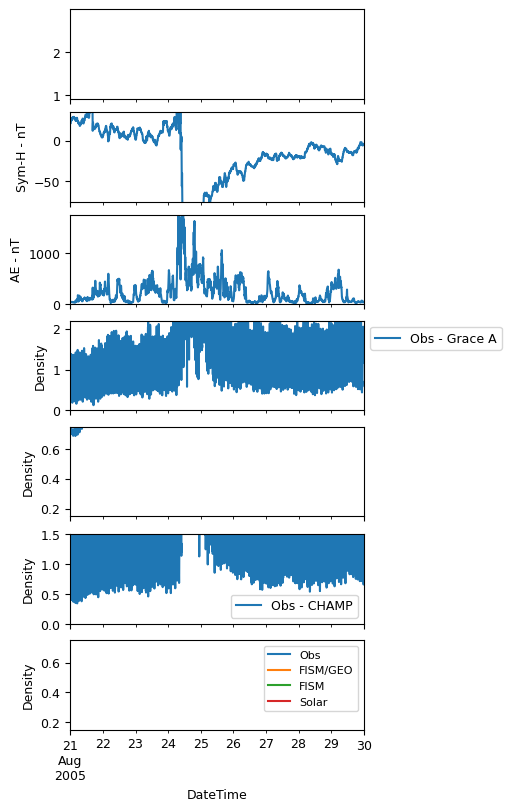

In [36]:
InteractiveShell.ast_node_interactivity = "last"
sfig = False
plt.rcParams.update({'font.size': 9})
plt.subplots_adjust(hspace=0)
#fig, ax = plt.subplots(8,1,figsize=(5,8),sharex=True, layout='constrained')
fig, ax = plt.subplots(7,1,figsize=(5,8),sharex=True, layout='constrained')

#define good times for plotting
om_gd = (om_d['DateTime'] > sdate) & (om_d['DateTime'] <= edate)
ga_gd = (oos_ga['DateTime'] > sdate) & (oos_ga['DateTime'] <= edate)
ch_gd = (oos_ch['DateTime'] > sdate) & (oos_ch['DateTime'] <= edate)
sat_gd = (sat_df['DateTime'] > sdate) & (sat_df['DateTime'] <= edate)

ax[0].plot(pd.to_datetime(ga_si['DateTime']), ga_si['400kmDensity_pred'])

#om_d[om_gd].plot(x='DateTime', y='Vsw', xlim=[sdate,edate], ax=ax[0], label='Vsw', ylabel='Vsw - km/s', legend=False)
#om_d[om_gd].plot(x='DateTime', y='dynP', xlim=[sdate,edate], ax=ax[0], label='$\mathregular{P_{dyn}}$', ylabel='$\mathregular{P_{dyn}}$ - nPa', legend=True, secondary_y=True)
#ax[0].legend(loc='upper right')
#om_d[om_gd].plot(x='DateTime', y='Bz_GSM', xlim=[sdate,edate], ax=ax[1], label='SW Bz', ylabel='$\mathregular{B_{z}}$ - nT', legend=False)


om_d[om_gd].plot(x='DateTime', y='SYM_H index', xlim=[sdate,edate], ax=ax[1], label='Sym-H', ylabel='Sym-H - nT', legend=False, ylim=(-75,35))
om_d[om_gd].plot(x='DateTime', y='AE', xlim=[sdate,edate], ax=ax[2], label='AE', ylabel='AE - nT', legend=False, ylim=(0,1750))


ga_fg.plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[3], label='Obs - Grace A', ylabel='Density', legend=True,ylim=(0,2.2))
ax[3].legend(bbox_to_anchor=(1.,1))


ga_fg[['DateTime','400kmDensity']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[4], label='Obs', ylabel='Density', legend=False, ylim=(0.15,0.75))
ga_fg[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM/GEO', ylabel='Density', legend=False)
ga_fi[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM', ylabel='Density', legend=False)
ga_si.plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[4], label='FISM', ylabel='Density', legend=False)


ch_fg.plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[5], label='Obs - CHAMP', ylabel='Density', legend=True, ylim=(0,1.5))


ch_fg[['DateTime','400kmDensity']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax[6], label='Obs', ylabel='Density', legend=True, ylim=(0.15,0.75))
ch_fg[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[6], label='FISM/GEO', ylabel='Density', legend=True)
ch_fi[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[6], label='FISM', ylabel='Density', legend=True)
ch_si[['DateTime','400kmDensity_pred']].rolling('6h',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax[6], label='Solar', ylabel='Density', legend=True)
ax[6].legend(bbox_to_anchor=(1.,1),fontsize=8)


fig.draw

if sfig:
    fig.savefig(f'C:/Users/krmurph1/OneDrive/SatDrag_RF/{pd.to_datetime(sdate).strftime("%Y%m%d")}.pdf', dpi=300, format='pdf')

In [37]:
f'C:/Users/krmurph1/OneDrive/SatDrag_RF/{pd.to_datetime(sdate).strftime("%Y%m%d")}.pdf'

'C:/Users/krmurph1/OneDrive/SatDrag_RF/20050821.pdf'

<Figure size 640x480 with 0 Axes>

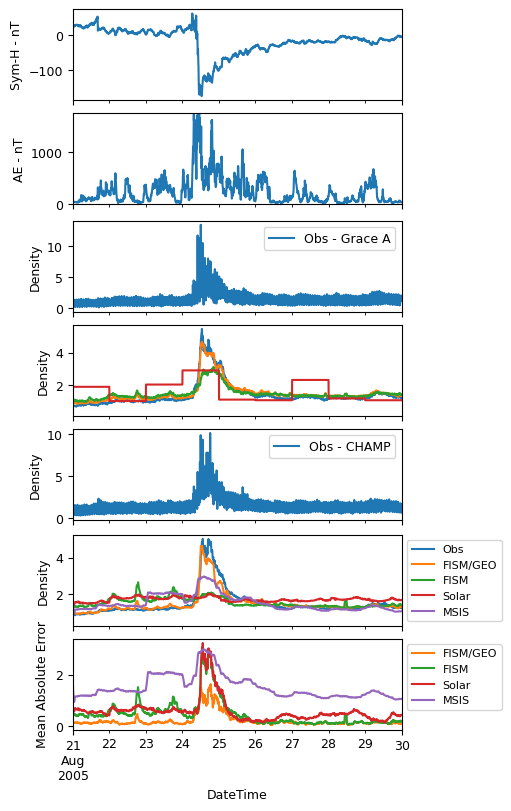

In [38]:
sfig = True
plt.rcParams.update({'font.size': 9})
plt.subplots_adjust(hspace=0)
#fig, ax = plt.subplots(8,1,figsize=(5,8),sharex=True, layout='constrained')
fig1, ax1 = plt.subplots(7,1,figsize=(5,8),sharex=True, layout='constrained')

#define good times for plotting
om_gd = (om_d['DateTime'] > sdate) & (om_d['DateTime'] <= edate)
ga_gd = (oos_ga['DateTime'] > sdate) & (oos_ga['DateTime'] <= edate)
ch_gd = (oos_ch['DateTime'] > sdate) & (oos_ch['DateTime'] <= edate)
sat_gd = (sat_df['DateTime'] > sdate) & (sat_df['DateTime'] <= edate)

#ax1[0].plot(pd.to_datetime(ga_si['DateTime']), ga_si['400kmDensity_pred'])

#om_d[om_gd].plot(x='DateTime', y='Vsw', xlim=[sdate,edate], ax=ax[0], label='Vsw', ylabel='Vsw - km/s', legend=False)
#om_d[om_gd].plot(x='DateTime', y='dynP', xlim=[sdate,edate], ax=ax[0], label='$\mathregular{P_{dyn}}$', ylabel='$\mathregular{P_{dyn}}$ - nPa', legend=True, secondary_y=True)
#ax[0].legend(loc='upper right')
#om_d[om_gd].plot(x='DateTime', y='Bz_GSM', xlim=[sdate,edate], ax=ax[1], label='SW Bz', ylabel='$\mathregular{B_{z}}$ - nT', legend=False)

pos = 0
om_d[om_gd].plot(x='DateTime', y='SYM_H index', xlim=[sdate,edate], ax=ax1[pos], label='Sym-H', ylabel='Sym-H - nT', legend=False)
om_d[om_gd].plot(x='DateTime', y='AE', xlim=[sdate,edate], ax=ax1[pos+1], label='AE', ylabel='AE - nT', legend=False, ylim=(0,1750))

pos = 2
ga_fg.plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax1[pos], label='Obs - Grace A', ylabel='Density', legend=True)
ax1[pos].legend(bbox_to_anchor=(1.,1))

pos = 3
ga_fg[['DateTime','400kmDensity']].rolling('90min',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax1[pos], label='Obs', ylabel='Density', legend=False)
ga_fg[['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[pos], label='FISM/GEO', ylabel='Density', legend=False)
ga_fi[['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[pos], label='FISM', ylabel='Density', legend=False)
ga_si.plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[pos], label='FISM', ylabel='Density', legend=False)

pos=4
ch_fg.plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax1[pos], label='Obs - CHAMP', ylabel='Density', legend=True)


pos=5
ch_fg[['DateTime','400kmDensity']].rolling('90min',on='DateTime').mean().plot(x='DateTime', y='400kmDensity', xlim=[sdate,edate], ax=ax1[pos], label='Obs', ylabel='Density', legend=True)
ch_fg[['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[pos], label='FISM/GEO', ylabel='Density', legend=True)
ch_fi[['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[pos], label='FISM', ylabel='Density', legend=True)
ch_si[['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean().plot(x='DateTime', y='400kmDensity_pred', xlim=[sdate,edate], ax=ax1[pos], label='Solar', ylabel='Density', legend=True)
msis_pro.rolling('90min',on='DateTime').mean().plot(x='DateTime', y='msis', xlim=[sdate,edate], ax=ax1[pos], label='MSIS', ylabel='Density', legend=True)
ax1[pos].legend(bbox_to_anchor=(1.,1),fontsize=8)

pos=6
ch_fg['Rolling MAE'] = ch_fg.set_index('DateTime')['resid'].abs().rolling('90min').mean().reset_index().drop(columns='DateTime').set_index(ch_fg.index)
ch_fi['Rolling MAE'] = ch_fi.set_index('DateTime')['resid'].abs().rolling('90min').mean().reset_index().drop(columns='DateTime').set_index(ch_fi.index)
ch_si['Rolling MAE'] = ch_si.set_index('DateTime')['resid'].abs().rolling('90min').mean().reset_index().drop(columns='DateTime').set_index(ch_si.index)
msis_pro['Rolling MAE'] = msis_pro.set_index('DateTime')['resid'].abs().rolling('90min').mean().reset_index().drop(columns='DateTime').set_index(msis_pro.index)

ch_fg['Rolling MAPE'] = ch_fg['resid'].abs().div(ch_fg['400kmDensity'].abs()).rolling(90,min_periods=1).mean().multiply(100).to_frame().set_index(ch_fg.index)
ch_fi['Rolling MAPE'] = ch_fi['resid'].abs().div(ch_fi['400kmDensity'].abs()).rolling(90,min_periods=1).mean().multiply(100).to_frame().set_index(ch_fi.index)
ch_si['Rolling MAPE'] = ch_si['resid'].abs().div(ch_si['400kmDensity'].abs()).rolling(90,min_periods=1).mean().multiply(100).to_frame().set_index(ch_si.index)

ch_fg.plot(x='DateTime', y='Rolling MAE', xlim=[sdate,edate], ax=ax1[pos], label='FISM/GEO', ylabel='Mean Absolute Error', legend=True, color='#ff7f0e')
ch_fi.plot(x='DateTime', y='Rolling MAE', xlim=[sdate,edate], ax=ax1[pos], label='FISM', ylabel='Mean Absolute Error', legend=True, color='#2ca02c')
ch_si.plot(x='DateTime', y='Rolling MAE', xlim=[sdate,edate], ax=ax1[pos], label='Solar', ylabel='Mean Absolute Error', legend=True, color='#d62728')
msis_pro.plot(x='DateTime', y='Rolling MAE', xlim=[sdate,edate], ax=ax1[pos], label='MSIS', ylabel='Mean Absolute Error', legend=True, color='#9467bd')
ax1[pos].legend(bbox_to_anchor=(1.,1),fontsize=8)


fig1.draw

if sfig:
    fig1.savefig(f'E:/OneDrive/SatDrag_RF/{pd.to_datetime(sdate).strftime("%Y%m%d")}_msis_err.pdf', dpi=300, format='pdf')

<Axes: xlabel='DateTime', ylabel='Density'>

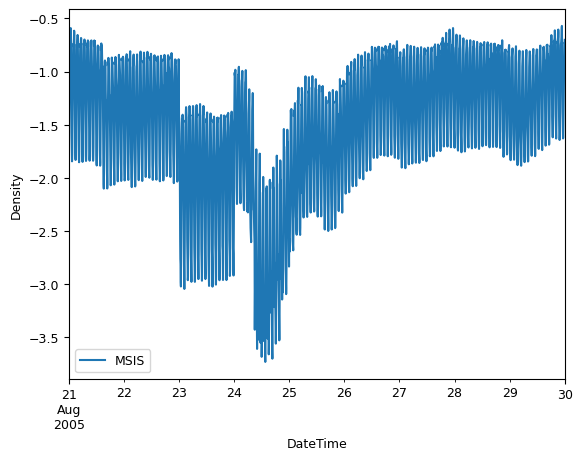

In [39]:
msis_pro.plot(x='DateTime', y='resid', xlim=[sdate,edate], label='MSIS', ylabel='Density', legend=True)

<Axes: xlabel='DateTime', ylabel='Density'>

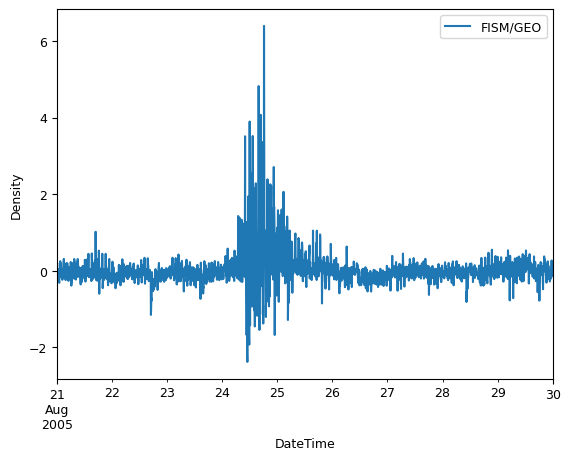

In [40]:
ch_fg.plot(x='DateTime', y='resid', xlim=[sdate,edate], label='FISM/GEO', ylabel='Density', legend=True)

In [41]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [42]:
gd = (ch_fg['DateTime'] > sdate) & (ch_fg['DateTime'] < edate)

ch_fg['resid'].div(ch_fg['400kmDensity']).abs().rolling(90,min_periods=1).mean().multiply(100).to_frame().set_index(ch_fg.index)[gd]

,0
382465,26.449560
382466,26.137034
382467,26.067293
382468,25.551634
382469,25.620783
...,...
385051,11.399068
385052,11.291963
385053,11.342066
385054,11.337363


In [43]:
ch_fg[gd].head()

,400kmDensity,400kmDensity_pred,DateTime,storm,storm phase,Model,resid,Rolling MAE,Rolling MAPE
382465,1.101933,1.331903,2005-08-21 00:05:00,-1,-1,FI_GEO,-0.229970,0.163792,26.449560
382466,1.148601,1.280106,2005-08-21 00:10:00,-1,-1,FI_GEO,-0.131505,0.160057,26.137034
382467,0.751063,0.770165,2005-08-21 00:15:00,-1,-1,FI_GEO,-0.019102,0.147228,26.067293
382468,0.715237,0.658945,2005-08-21 00:20:00,-1,-1,FI_GEO,0.056293,0.145077,25.551634
382469,0.557800,0.596270,2005-08-21 00:25:00,-1,-1,FI_GEO,-0.038470,0.139259,25.620783
